This file uses .edf file as data source

# EDF data processing

Extracting EDF parameters from /Users/lejieliu/Documents/LucidDreamInduction/sample_data/E244GH55FX1U_1737280614000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3661374  =      0.000 ... 29290.992 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: LF-FpZ, OTE_L-FpZ, RF-FpZ, OTE_R-FpZ
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: 2025-01-19 16:56:54 UTC
 nchan: 4
 projs: []
 sfreq: 125.0 Hz
 subject_info: 3 items (dict)
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_30992/1874644457.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


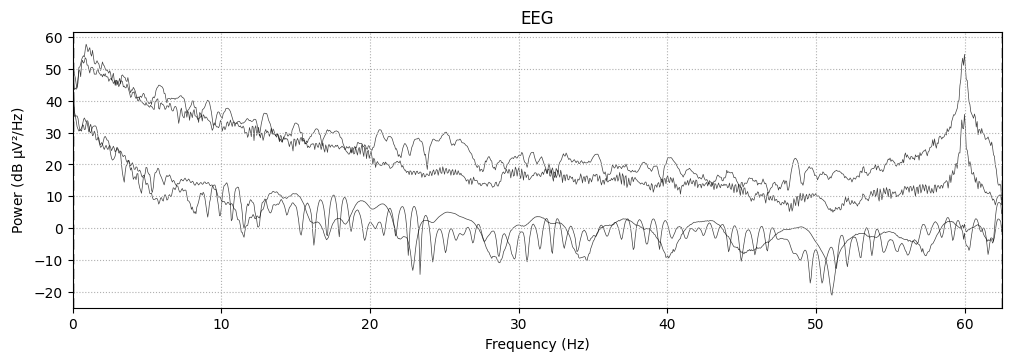

In [4]:
import mne
from mne.preprocessing import ICA

raw = mne.io.read_raw_edf("/Users/lejieliu/Documents/LucidDreamInduction/sample_data/E244GH55FX1U_1737280614000.edf", preload=True)

print(raw.info)
raw.plot_psd()

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_30992/4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


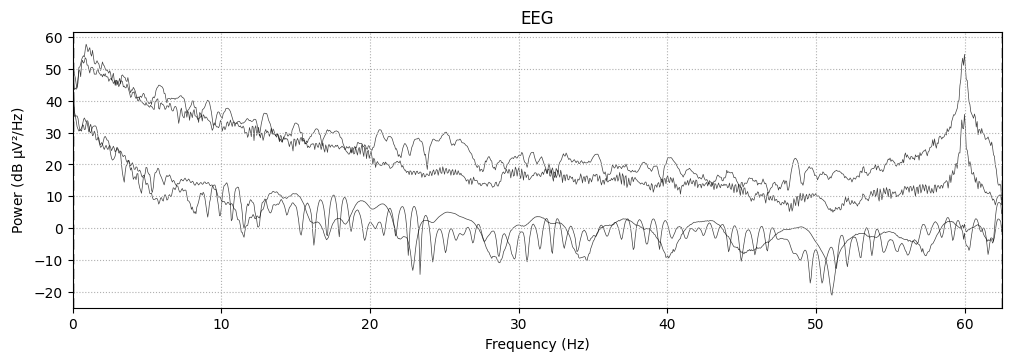

In [5]:
raw.compute_psd().plot()

In [6]:
raw.filter(l_freq=0.5, h_freq=40)
raw.notch_filter(freqs=60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband ed

<RawEDF | E244GH55FX1U_1737280614000.edf, 4 x 3661375 (29291.0 s), ~111.7 MB, data loaded>

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_30992/4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


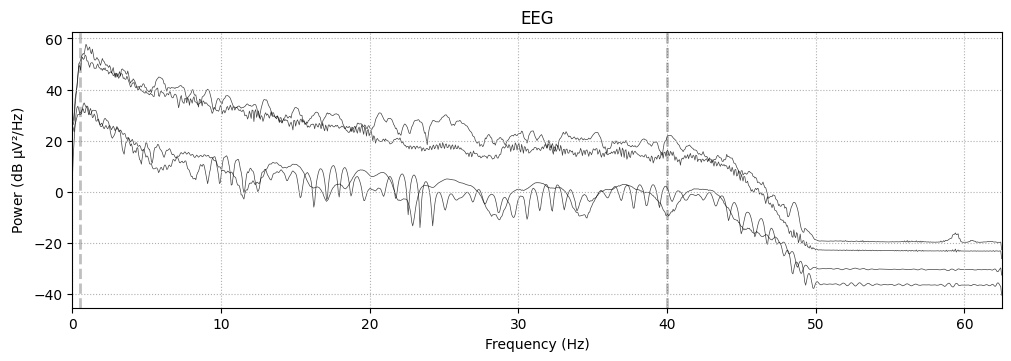

In [7]:
raw.compute_psd().plot()

## Detect whether the frequency has been influenced by the EOG and EMG

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_30992/3623999173.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmin=30, fmax = 60).plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


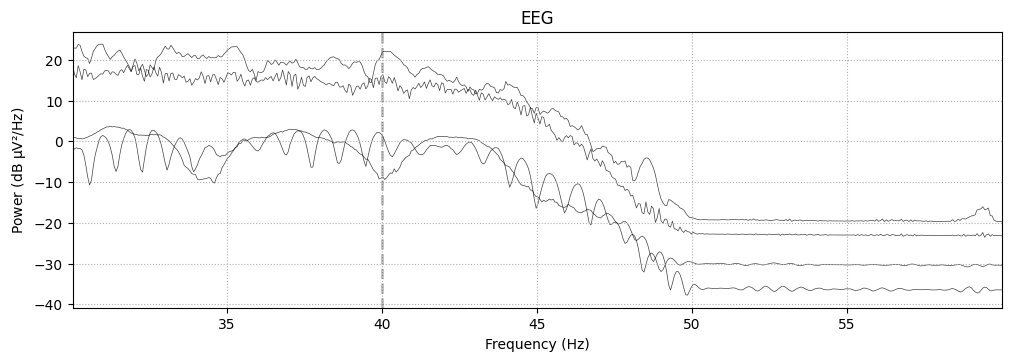

In [8]:
raw.compute_psd(fmin=30, fmax = 60).plot()

## Use ICA filter to remove the EOG

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 6.4s.
Creating RawArray with float64 data, n_channels=4, n_times=3661375
    Range : 0 ... 3661374 =      0.000 ... 29290.992 secs
Ready.
Using matplotlib as 2D backend.


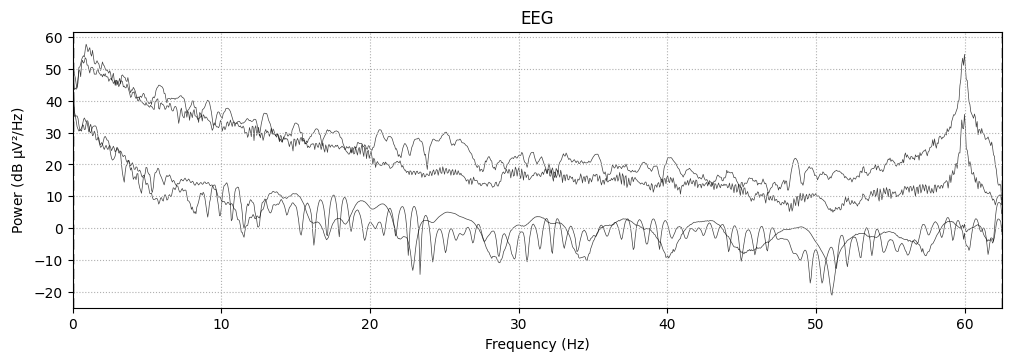

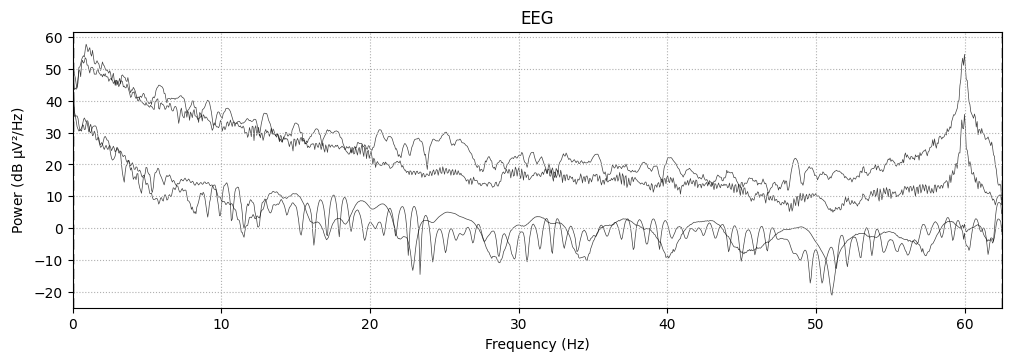

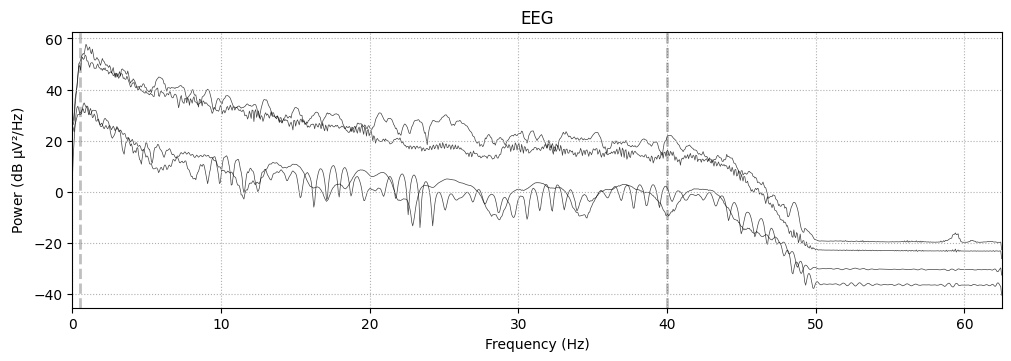

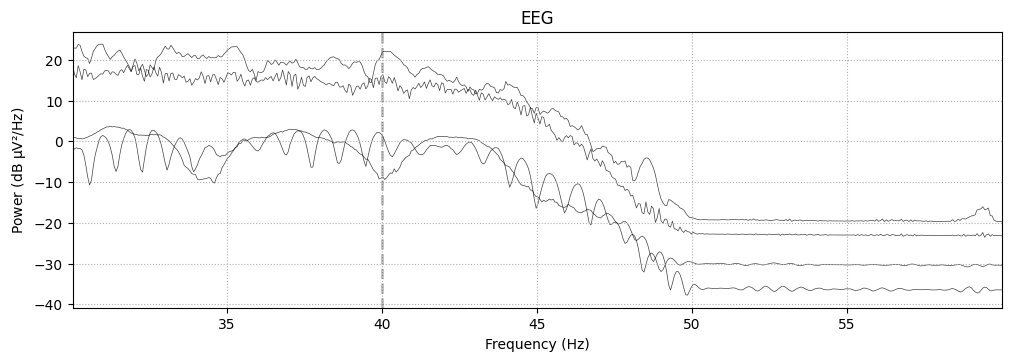

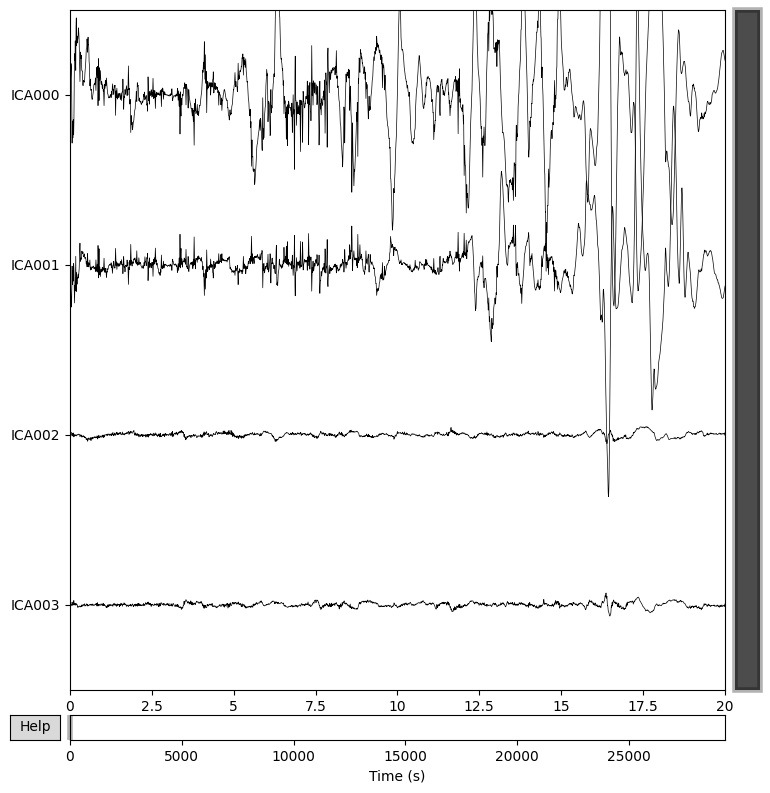

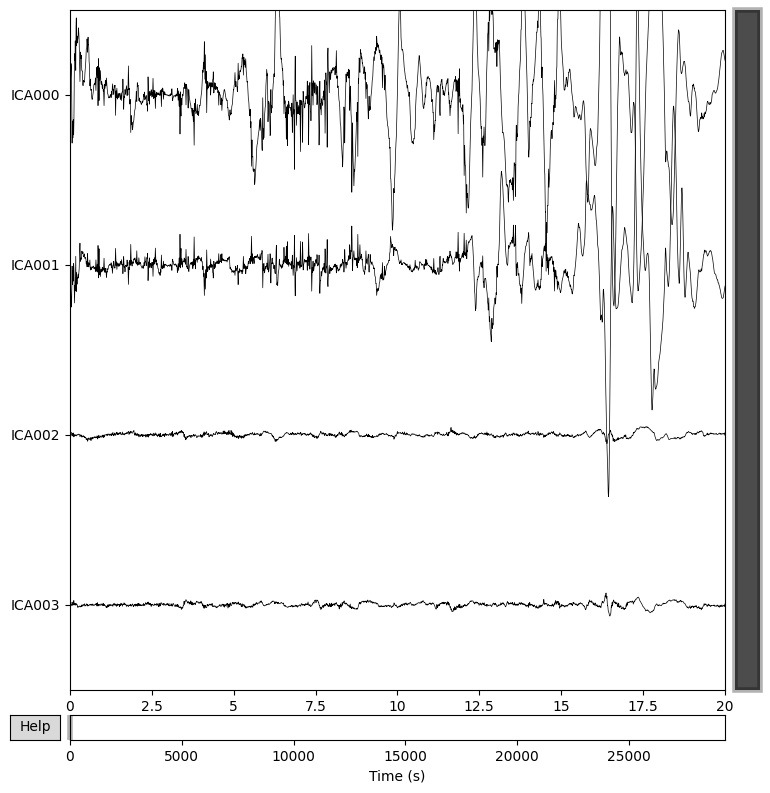

In [9]:
ica = ICA(n_components=4, random_state=97)
ica.fit(raw)
ica.plot_sources(raw)

## ICA clean process

In [10]:
ica.exclude = [0, 1]

ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 2 ICA components
    Projecting back using 4 PCA components


<RawEDF | E244GH55FX1U_1737280614000.edf, 4 x 3661375 (29291.0 s), ~111.7 MB, data loaded>

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_30992/2327585885.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


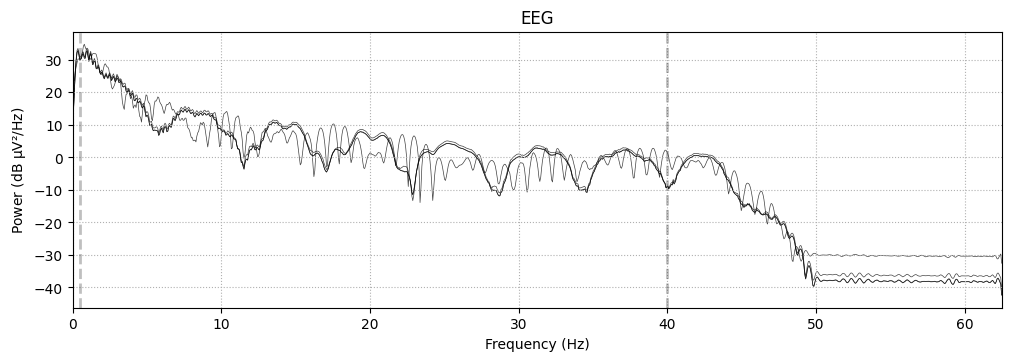

In [11]:
psd = raw.compute_psd()
psd.plot()

# Sliding Window Based Feature Extraction for Alertness

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch
from sklearn.preprocessing import MinMaxScaler
raw.info["ch_names"]

['LF-FpZ', 'OTE_L-FpZ', 'RF-FpZ', 'OTE_R-FpZ']

In [291]:
from mne.utils import use_log_level
mne.set_log_level('ERROR')


In [14]:
tp = raw.get_data()

In [15]:
tp[:2]

array([[ 2.54979200e-11, -1.35660999e-05, -1.06901941e-05, ...,
         1.45403794e-08,  7.16789890e-09,  2.54979199e-11],
       [ 5.72497231e-09, -1.78241495e-05, -2.22164144e-06, ...,
         3.22057793e-09,  4.38040267e-09,  5.72497231e-09]])

In [267]:
data = raw.get_data()  # shape: [n_channels, n_times]

sfreq = raw.info['sfreq']

win_sec = 2.5 # window length in seconds
step_sec = 1 # step size in seconds

n_win_samples = int(win_sec * sfreq)
n_step_samples = int(step_sec * sfreq)

features_over_time = []

for start in range(0, data.shape[1] - n_win_samples, n_step_samples):
    segment = data[:, start:start + n_win_samples]
    with use_log_level("ERROR"):
        psds, freqs = psd_array_welch(segment, sfreq=sfreq, fmin=1, fmax=40, n_fft=256)

    theta = psds[:, (freqs >= 4) & (freqs <= 8)].mean(axis=1)
    alpha = psds[:, (freqs >= 8) & (freqs <= 12)].mean(axis=1)
    beta  = psds[:, (freqs >= 13) & (freqs <= 30)].mean(axis=1)

    alpha_theta_ratio = alpha / (theta)
    beta_theta_ratio = beta / (theta)

    features_over_time.append({
        "start_time": start / sfreq,
        "theta": theta.mean(),
        "alpha": alpha.mean(),
        "beta": beta.mean(),
        "alpha_theta_ratio": alpha_theta_ratio.mean(),
        "beta_theta_ratio": beta_theta_ratio.mean()
    })


In [226]:
df_time_features = pd.DataFrame(features_over_time)

In [227]:
df_time_features[0:10]

,start_time,theta,alpha,beta,alpha_theta_ratio,beta_theta_ratio
0,0.0,6.890599e-13,5.636684e-13,5.825191e-13,1.063054,1.202910
1,1.0,8.607349e-13,9.094656e-13,8.780120e-13,1.058461,1.021990
2,2.0,1.903861e-12,9.890777e-13,8.177969e-13,0.554795,0.447893
3,3.0,1.971456e-12,8.858761e-13,6.894733e-13,0.449942,0.350110
4,4.0,1.315140e-12,6.629993e-13,7.672865e-13,0.500812,0.599936
5,5.0,3.929991e-12,3.423174e-13,3.446675e-13,0.087152,0.087763
6,6.0,1.612584e-12,5.357511e-13,3.411037e-13,0.333424,0.212956
7,7.0,1.377399e-12,7.662900e-13,5.541797e-13,0.614526,0.455214
8,8.0,1.238439e-12,7.362164e-13,2.880387e-13,0.588533,0.231915
9,9.0,1.962041e-12,2.448212e-13,4.503514e-13,0.127317,0.228393


In [245]:
df = df_time_features.copy()

df['alpha_theta_smooth'] = df['alpha_theta_ratio'].rolling(window=3).mean()
df['beta_theta_smooth']  = df['beta_theta_ratio'].rolling(window=3).mean()


# df['alert'] = (df['alpha_theta_smooth'] > 0.4) & (df['beta_theta_smooth'] > 0.3)
# df['alert_int'] = df['alert'].astype(float)
# # df['alertness_score'] = df['alert'].rolling(window=50, min_periods=1).mean()
# df['alertness_score_ema'] = df['alert_int'].ewm(span=10, adjust=False).mean()

df['alpha_theta_score'] = df['alpha_theta_smooth'].clip(0.2, 0.6)
df['alpha_theta_score'] = (df['alpha_theta_score'] - 0.2) / (0.6 - 0.2)

df['beta_theta_score'] = df['beta_theta_smooth'].clip(0.2, 0.6)
df['beta_theta_score'] = (df['beta_theta_score'] - 0.2) / (0.6 - 0.2)

# Combine both scores
df['alertness_score'] = (df['alpha_theta_score'] + df['beta_theta_score']) / 2

# Final EMA score
df['alertness_score_ema'] = df['alertness_score'].ewm(span=100, adjust=True).mean()


## Read sleep stage data (.csv) for alertness score qualification

In [269]:
file_path = '/Users/lejieliu/Documents/LucidDreamInduction/sample_data/E244GH55FX1U_1737280614000.csv'
sleep_data = pd.read_csv(file_path)

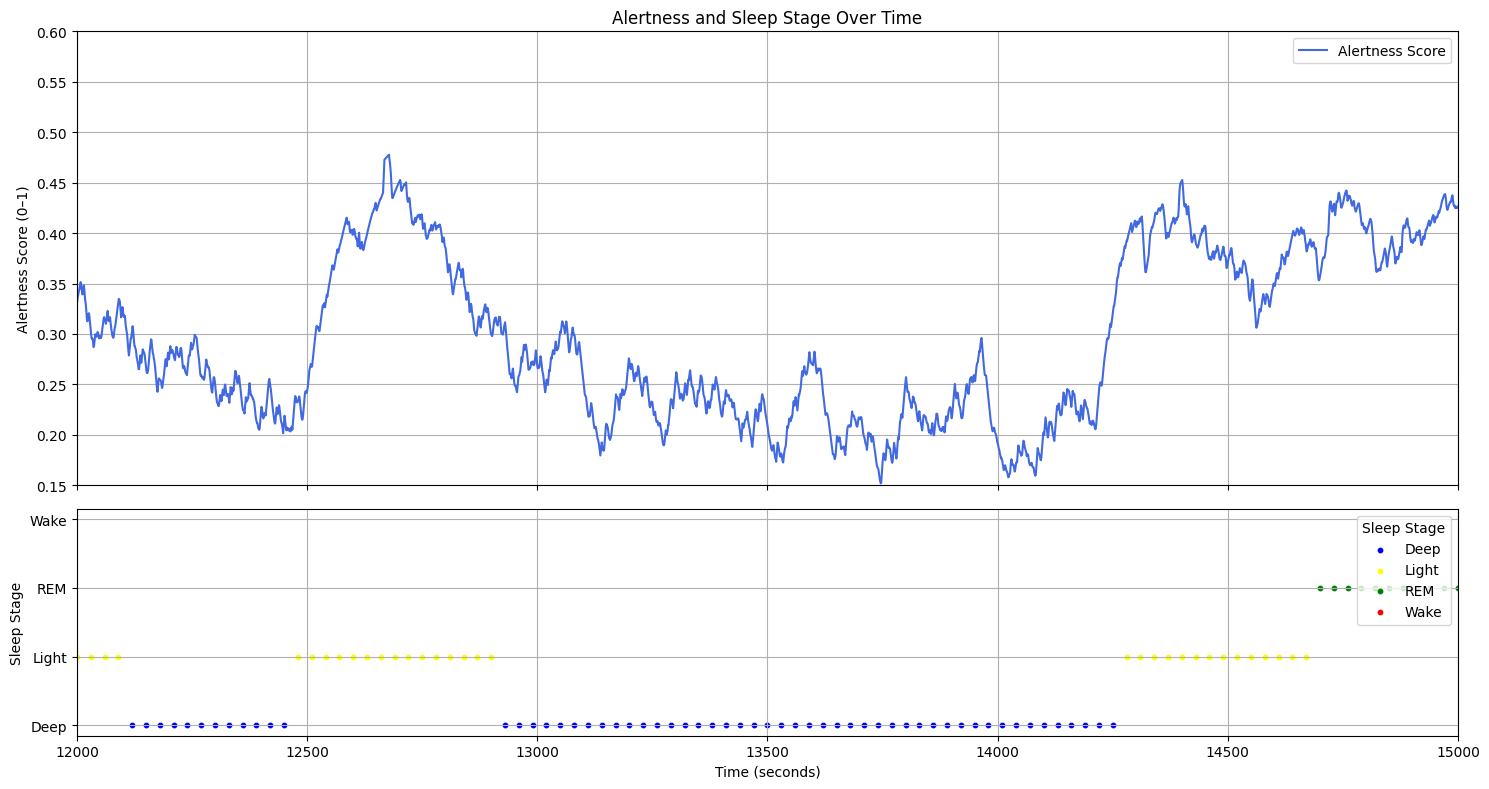

In [264]:
import matplotlib.pyplot as plt

start_time = 0000
start_time = 12000
end_time = 30000
end_time = 15000

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})

# ==== Alertness Score ====
ax1.plot(df['start_time'], df['alertness_score_ema'], linestyle='-', color='royalblue', label='Alertness Score')
ax1.set_ylabel("Alertness Score (0–1)")
ax1.set_title("Alertness and Sleep Stage Over Time")
ax1.set_ylim(0, 1)
ax1.grid(True)
ax1.legend(loc='upper right')

# ==== Sleep Stage ====
# data['Relative Time'] = (data['Timestamp'] - data['Timestamp'].iloc[0])  

stage_colors = {
    'Deep': 'blue',
    'Light': 'yellow',
    'REM': 'green',
    'Wake': 'red'
}

for stage, color in stage_colors.items():
    stage_data = data[data['Sleep stage'] == stage]
    ax2.scatter(stage_data['Relative Time'], [stage] * len(stage_data), color=color, label=stage, s=10)

ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Sleep Stage")
ax2.legend(title='Sleep Stage', loc='upper right')
ax2.grid(True)

ax1.set_ylim(0.15, 0.6)
ax2.set_xlim(start_time, end_time)

plt.tight_layout()
plt.show()


# Machine Learning Model

In [314]:
sleep_series = sleep_data['Sleep stage'].reset_index(drop=True)

win_sec, step_sec = 3, 1
n_win, n_step = int(win_sec*sfreq), int(step_sec*sfreq)
feat_list, label_list = [], []

for st in range(0, data.shape[1] - n_win, n_step):
    seg = data[:, st:st+n_win]
    psd, f = psd_array_welch(seg, sfreq, fmin=0.5, fmax=40,
                             n_fft=n_win)   # <= 关键
    
    band = lambda lo, hi: psd[:, (f >= lo) & (f < hi)].mean(axis=1).mean()
    
    alpha, theta = band(8,12), band(4,8)
    beta,  gamma = band(13,30), band(30,40)
    delta = band(0.5,4)

    epoch_idx = int((st / sfreq) // 30)
    if epoch_idx >= len(sleep_series):
        break                       # 已经没有对应的 30 s 注释，停止循环

    stage = sleep_series.iloc[epoch_idx]
    if stage == 'Wake':
        label = 0.9
    elif stage == 'Deep':
        label = 0.1
    elif stage == 'REM':
        label = 0.65
    elif stage == 'Light':
        label = 0.35
    else:
        label = np.nan              # Light / REM 等

    features = [
        alpha, beta, theta, gamma, delta,
        alpha/theta, beta/theta, beta/alpha,
        (beta+gamma)/(alpha+theta),
        theta/(alpha+beta)
    ]
    feat_list.append(features)
    label_list.append(label)



In [315]:
feature_names = [
    'alpha', 'beta', 'theta', 'gamma', 'delta',
    'alpha_theta', 'beta_theta', 'beta_alpha',
    'high_low', 'theta_over_alpha_beta'
]

df_feat = pd.DataFrame(feat_list, columns=feature_names)
df_feat['label'] = label_list   

train_df = df_feat.dropna(subset=['label']).reset_index(drop=True)
X = train_df[feature_names].values
y = train_df['label'].values.astype(float)

In [316]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y.round()
)

In [317]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    objective='regression'
)
lgb_reg.fit(X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='l2'
            )
print("Val R²:", lgb_reg.score(X_val, y_val))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 23424, number of used features: 10
[LightGBM] [Info] Start training from score 0.473990
Val R²: 0.5697825934363522


/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [318]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(lgb_reg, X, y, cv=cv, scoring='neg_mean_squared_error')
print("5-fold CV RMSE:", np.sqrt(-cv_scores).mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 23424, number of used features: 10
[LightGBM] [Info] Start training from score 0.474347


/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 23424, number of used features: 10
[LightGBM] [Info] Start training from score 0.473960


/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 23424, number of used features: 10
[LightGBM] [Info] Start training from score 0.474763


/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 23424, number of used features: 10
[LightGBM] [Info] Start training from score 0.475280


/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 23424, number of used features: 10
[LightGBM] [Info] Start training from score 0.472295
5-fold CV RMSE: 0.16852223958900844


/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [335]:
X_all = df_feat[feature_names].values
pred_alert = lgb_reg.predict(X_all)                 # 0–1 连续值
df_feat['alert_pred'] = pred_alert
df_feat['alert_pred_ema'] = df_feat['alert_pred'].ewm(span=5, adjust=False).mean()

/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


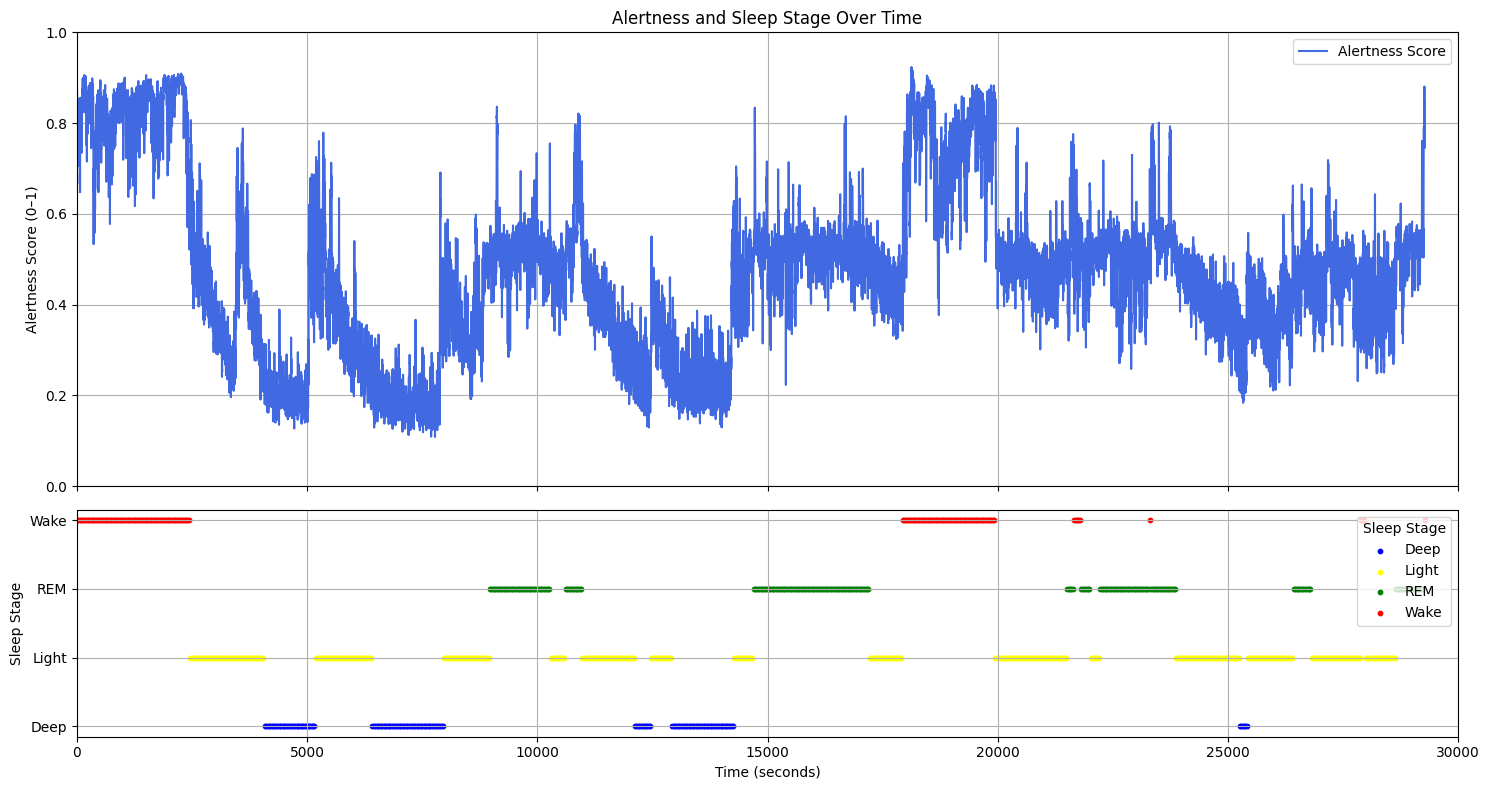

In [338]:
import matplotlib.pyplot as plt

start_time = 0000
# start_time = 12400
# end_time = 100
end_time = 30000

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})

# ==== Alertness Score ====
ax1.plot(df_feat['alert_pred_ema'], linestyle='-', color='royalblue', label='Alertness Score')
ax1.set_ylabel("Alertness Score (0–1)")
ax1.set_title("Alertness and Sleep Stage Over Time")
ax1.set_ylim(0, 1)
ax1.grid(True)
ax1.legend(loc='upper right')

# ==== Sleep Stage ====
sleep_data['Relative Time'] = (sleep_data['Timestamp'] - sleep_data['Timestamp'].iloc[0])  

stage_colors = {
    'Deep': 'blue',
    'Light': 'yellow',
    'REM': 'green',
    'Wake': 'red'
}

for stage, color in stage_colors.items():
    stage_data = sleep_data[sleep_data['Sleep stage'] == stage]
    ax2.scatter(stage_data['Relative Time'], [stage] * len(stage_data), color=color, label=stage, s=10)

ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Sleep Stage")
ax2.legend(title='Sleep Stage', loc='upper right')
ax2.grid(True)

ax1.set_ylim(0, 1)
ax2.set_xlim(start_time, end_time)

plt.tight_layout()
plt.show()